In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
data=pd.read_csv(".\\Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#data cleaning begins

In [5]:
data.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
data.drop(['availability','area_type','society','balcony'],axis=1,inplace=True) # he drops areatype insteaad of label encoding

In [7]:
median=np.median(data['bath'].dropna())
data['bath'].fillna(median,inplace=True)
data.head()

C:\Users\SV\AppData\Local\Temp\ipykernel_10116\3792323191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bath'].fillna(median,inplace=True)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [9]:
data['bhk']=data['size'].astype(str).apply(lambda x: x.split(" ")[0])
data['bhk'] = pd.to_numeric(data['bhk'], errors='coerce')
median2 = data['bhk'].dropna().median()
data['bhk'].fillna(median2,inplace=True)
data['bhk']=data['bhk'].astype('int')
data.drop(['size'],axis=1,inplace=True)
data.head()

C:\Users\SV\AppData\Local\Temp\ipykernel_10116\3818363600.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bhk'].fillna(median2,inplace=True)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [10]:
data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [11]:
data[data['bhk']>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [12]:
data.drop(data[data['bath']==40].index,axis=0,inplace=True)  # its not possible to have 40 bathrooms with only 2400 sqft
data[data['bhk']>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27


In [13]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(string):
  try:
    float(string)
  except:
    return False
  return True

In [15]:
data[~data['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2


In [16]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return(float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [17]:
data['total_sqft']=data['total_sqft'].apply(convert_sqft_to_num)
data[~data['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk


In [18]:
data.loc[775]

location      Basavanagara
total_sqft             NaN
bath                   2.0
price                 93.0
bhk                      1
Name: 775, dtype: object

In [23]:
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')  # non number to nan
data.dropna(subset=['total_sqft'],inplace=True)
data=data.dropna()
data.shape

(13272, 5)

In [24]:
# Dimension reduction

In [25]:
len(data['location'].unique())

1299

In [26]:
location_stats=data['location'].value_counts().sort_values(ascending=False)

In [27]:
loc_less_than_10=location_stats[location_stats<=10]

In [28]:
len(loc_less_than_10)

1059

In [29]:
len(data.location.unique())

1299

In [30]:
data.location=data.location.apply(lambda x: 'other' if x in loc_less_than_10 else x)
len(data.location.unique())

241

In [31]:
data[data.total_sqft/data.bhk < 300].head()  # got 300 by domain knowledge or friend
#see 6 bhk in just 1020 all are outlier

,location,total_sqft,bath,price,bhk
9,other,1020.0,6.0,370.0,6
45,HSR Layout,600.0,9.0,200.0,8
58,Murugeshpalya,1407.0,4.0,150.0,6
68,other,1350.0,7.0,85.0,8
70,other,500.0,3.0,100.0,3


In [32]:
data=data[~(data.total_sqft/data.bhk < 300)]
data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [33]:
# feature engineering starts

In [34]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']
data.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [72]:
def remove_pps_outliers(df):  # zscore 1 (68% retention), 2(95%), 3(99.7%)
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):  # in (m +- 1*std) datapoints lie withing 1 standard deviation away from mean
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]  # mean + 3*std.. to this z score of 1 is choosen
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(data)
df2.shape

(10304, 6)

In [73]:
import matplotlib.pyplot as plt

In [74]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize = (5,4))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

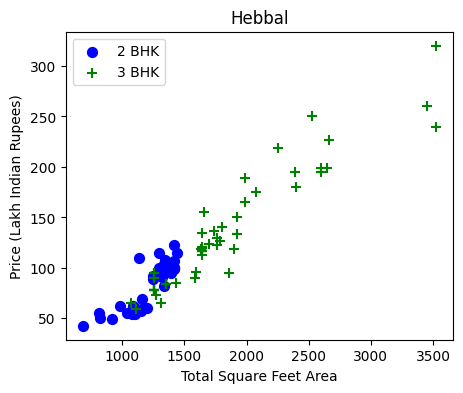

In [75]:
plot_scatter_chart(df2,"Hebbal") #so wrongs are there

In [76]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']), 
                'count': bhk_df.shape[0] 
                } 
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
df3 = remove_bhk_outliers(df2)

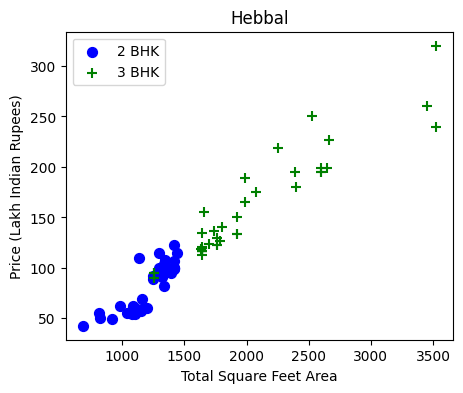

In [77]:
plot_scatter_chart(df3,"Hebbal") # yayayy chuu mantrrr hogae

In [78]:
df3.reset_index(drop=True)
df3.shape


(7361, 6)

In [79]:
data['bhk'].unique()

array([ 2,  4,  3,  1,  8,  6,  5,  7, 11,  9, 10, 16, 13])

In [80]:
data[pd.isnull(data.total_sqft)]

,location,total_sqft,bath,price,bhk,price_per_sqft


In [81]:
# outlier detection and removal


In [82]:
data.price_per_sqft.describe()  # max too away from 75%

count     12529.000000
mean       6304.053504
std        4162.395819
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [83]:
'''q1=4210.5
q3=6916.7
iqr=q3-q1
x=q1-iqr*1.5
y=q3+iqr*1.5
data=data[(data.price_per_sqft <=y) & ( data.price_per_sqft >=x)]
data.price_per_sqft.describe()'''

'q1=4210.5\nq3=6916.7\niqr=q3-q1\nx=q1-iqr*1.5\ny=q3+iqr*1.5\ndata=data[(data.price_per_sqft <=y) & ( data.price_per_sqft >=x)]\ndata.price_per_sqft.describe()'

In [84]:
data.shape

(12529, 6)

Text(0, 0.5, 'Count')

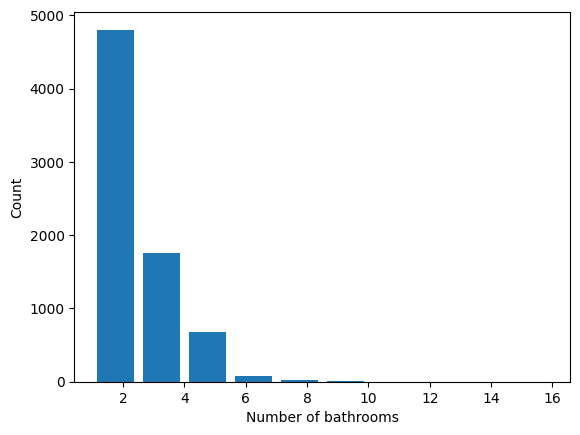

In [85]:
plt.hist(df3.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [86]:
df3[df3.bath>10]   # it is unusual to have 2 more bathrooms than bedrooms

,location,total_sqft,bath,price,bhk,price_per_sqft
5307,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8534,other,12000.0,12.0,525.0,10,4375.000000
8623,other,10000.0,16.0,550.0,16,5500.000000
9363,other,6000.0,12.0,150.0,11,2500.000000
9696,other,5425.0,13.0,275.0,13,5069.124424


In [87]:
df3=df3[df3.bath<df3.bhk +2]
df3.shape

(7282, 6)

In [88]:
df3.drop(['price_per_sqft'],axis=1,inplace=True) #droped price per sqft cause its not needed anymore

In [89]:
# Model Building
dummies=pd.get_dummies(df3.location,dtype=np.int8)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df3=pd.concat([df3,dummies.drop(['other'],axis=1)],axis=1)

In [91]:
df3.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df3.location=df3.location.astype(str)
df3.location=df3.location.str.strip()
df3.columns=df3.columns.str.strip()

In [93]:
df3[df3.location=='Devarachikkanahalli'].head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df3.shape

(7282, 245)

In [95]:
x=df3.drop(['price','location'],axis=1)
y=df3.price
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=643,shuffle=True)  # shuffle needs to be true as we had
# we had data grouped by location and by default Kfold or train test split these split without shuffling.
# OR USE shuffled_df = df.sample(frac=1, random_state=0).reset_index(drop=True) TO SHUFFLE DF BEFORE X Y INIT

In [104]:
score=0
state=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=i,shuffle=True)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    if score<lr.score(xtest,ytest):
        score=lr.score(xtest,ytest)
        state=i


In [105]:
print(state,"\n",score)

643 
 0.9052545350840538


In [109]:
from sklearn.linear_model import LinearRegression  # data is continous not categorical(rank)(nominal or ordinal)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
lr.score(xtest,ytest)

0.9052545350840538

In [110]:
from sklearn.metrics import r2_score
score=r2_score(pred,ytest)
score

0.9085888758293169

In [111]:
lr.score(xtest,ytest)

0.9052545350840538

In [112]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)     # using shuffle split is essential here

array([0.78235958, 0.84957157, 0.83058247, 0.86589344, 0.83894461])

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {

            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # COULD HAVE AVOIDED USING THIS IF HAD SHUFFLED DF
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=9, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.833470,{}
1,lasso,0.682504,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.747968,"{'criterion': 'squared_error', 'splitter': 'be..."


In [115]:
import pickle
with open("bengaluru_House_Data.pkl",'wb') as f:
  pickle.dump(lr,f)

In [116]:
import json # need columns list for application
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [145]:
np.where(x.columns=='Devarachikkanahalli')[0][0]

3

In [157]:
columns['data_columns']

['total_sqft',
 'bath',
 'bhk',
 'devarachikkanahalli',
 '1st block jayanagar',
 '1st phase jp nagar',
 '2nd phase judicial layout',
 '2nd stage nagarbhavi',
 '5th block hbr layout',
 '5th phase jp nagar',
 '6th phase jp nagar',
 '7th phase jp nagar',
 '8th phase jp nagar',
 '9th phase jp nagar',
 'aecs layout',
 'abbigere',
 'akshaya nagar',
 'ambalipura',
 'ambedkar nagar',
 'amruthahalli',
 'anandapura',
 'ananth nagar',
 'anekal',
 'anjanapura',
 'ardendale',
 'arekere',
 'attibele',
 'beml layout',
 'btm 2nd stage',
 'btm layout',
 'babusapalaya',
 'badavala nagar',
 'balagere',
 'banashankari',
 'banashankari stage ii',
 'banashankari stage iii',
 'banashankari stage v',
 'banashankari stage vi',
 'banaswadi',
 'banjara layout',
 'bannerghatta',
 'bannerghatta road',
 'basavangudi',
 'basaveshwara nagar',
 'battarahalli',
 'begur',
 'begur road',
 'bellandur',
 'benson town',
 'bharathi nagar',
 'bhoganhalli',
 'billekahalli',
 'binny pete',
 'bisuvanahalli',
 'bommanahalli',
 'b

In [188]:
def predict_price(location,total_sqft,bath,bhk):
  location = location.strip().lower()
  
  data_columns_lower = [col.lower() for col in columns['data_columns']]
  if location not in data_columns_lower:
    print(f"Location '{location}' not found.")
    return None
  loc_index=data_columns_lower.index(location)
  a=np.zeros(len(columns["data_columns"]))
  a[0]=total_sqft
  a[1]=bath
  a[2]=bhk
  if loc_index>=0:
    a[loc_index]=1
  return lr.predict([a])[0]

In [189]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\SV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.90502064984467

In [190]:
set(x.columns)-set(xtrain.columns)

set()

In [191]:
predict_price('Indira Nagar',1000,3,3)

C:\Users\SV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.90960994365096

In [193]:
predict_price('akshaya nagar',1000,3,3)  # 2,2 more costy than 3,3 cause sqft same so congested

C:\Users\SV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.41138408790596